#1.UNDERSTAND THE STRUCTURE OF THE DATASET


# Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, norm, mannwhitneyu

In [ ]:
df = pd.read_csv("/content/netflix_titles.csv")

In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [ ]:
df.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#2.CLEAN AND PRE-PROCESS THE DATASET


In [ ]:
df.columns = df.columns.str.capitalize()

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.size

105684

In [ ]:
df.ndim

2

#FINDING MISSING VALUES

In [ ]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Show_id            0
Type               0
Title              0
Director        2634
Cast             825
Country          831
Date_added        10
Release_year       0
Rating             4
Duration           3
Listed_in          0
Description        0
dtype: int64


In [ ]:
df.isnull().sum().sum()

np.int64(4307)

#UNIQUE VALUE IDENTIFICATION

In [ ]:
df.nunique()

,0
Show_id,8807
Type,2
Title,8807
Director,4528
Cast,7692
Country,748
Date_added,1767
Release_year,74
Rating,17
Duration,220


#DROP THE COLUMN

In [ ]:

df = df.drop(['Cast'],axis=1)
df = df.drop(["Description"],axis=1)

In [ ]:
df.isnull().sum()

,0
Show_id,0
Type,0
Title,0
Director,2634
Country,831
Date_added,10
Release_year,0
Rating,4
Duration,3
Listed_in,0


#UPDATING THE MISSING VALUES USING MEDIAN VALUES OR THE MODE VALUES

In [ ]:
df['Country'] = df['Country'].fillna(method='ffill')              #FFILL IS USED FOR FORWARD FILLING
df['Date_added'].fillna(df['Date_added'].mode()[0], inplace=True) #DATE IS FILLED WITH THE MODE VALUES
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)         #RATING IS FILLED WITH THE MODE VALUES
df['Duration'].fillna(df['Duration'].mode()[0], inplace=True)     #DURATION IS FILLED WITH THE MODE VALUES

/tmp/ipython-input-1956933579.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Country'] = df['Country'].fillna(method='ffill')              #FFILL IS USED FOR FORWARD FILLING
/tmp/ipython-input-1956933579.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date_added'].fillna(df['Date_added'].mode()[0], inplace=True) #DATE IS FILLED WITH THE MODE VALUES
/tmp/ipython-input-1956933579.py:3: FutureWarning: A value is trying to be 

#REMOVING THE DIRECTORS AND DATE_ADDED NULL VALUES ROWS

In [ ]:
df.dropna(subset=['Director'], inplace=True)
df.dropna(subset=['Date_added'], inplace=True)

#CHANGING THE DATE_ADDED(OBJECT) DATATYPE INTO DATE_ADDED(datetime)

In [ ]:
df['Date_added'] = pd.to_datetime(df['Date_added'], errors='coerce')

#ADD THE NEW COLUMN AS CONTENT_AGE,YEAR_ADDED,MONTH_ADDED,NUMBER_OF_SHOWS

In [ ]:
df['Year_added'] = df['Date_added'].dt.year
df['Month_added'] = df['Date_added'].dt.month_name()
df['Content_age'] = df['Year_added'] - df['Release_year']
df['Number_of_Shows'] = df['Listed_in'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
df.head(10)

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Rating,Duration,Listed_in,Year_added,Month_added,Content_age,Number_of_Shows
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,1,1
2,s3,TV Show,Ganglands,Julien Leclercq,South Africa,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,0,3
5,s6,TV Show,Midnight Mass,Mike Flanagan,India,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,September,0,3
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",India,2021-09-24,2021,PG,91 min,Children & Family Movies,2021,September,0,1
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September,28,3
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,September,0,2
9,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021,September,0,2
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,United States,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,0,3
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",2021,September,0,2
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Germany, Czech Republic",2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,September,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6173 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Show_id          6173 non-null   object        
 1   Type             6173 non-null   object        
 2   Title            6173 non-null   object        
 3   Director         6173 non-null   object        
 4   Country          6173 non-null   object        
 5   Date_added       6168 non-null   datetime64[ns]
 6   Release_year     6173 non-null   int64         
 7   Rating           6173 non-null   object        
 8   Duration         6173 non-null   object        
 9   Listed_in        6173 non-null   object        
 10  Year_added       6168 non-null   float64       
 11  Month_added      6168 non-null   object        
 12  Content_age      6168 non-null   float64       
 13  Number_of_Shows  6173 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), o

#CHANGING THE DATATYPE

In [ ]:
df['Year_added'] = df['Year_added'].astype(int)
df['Content_age'] = df['Content_age'].astype(int)

#CHECKING THE DATASET AFTER EVERY MODIFICATION

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6173 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Show_id          6173 non-null   object        
 1   Type             6173 non-null   object        
 2   Title            6173 non-null   object        
 3   Director         6173 non-null   object        
 4   Country          6173 non-null   object        
 5   Date_added       6173 non-null   datetime64[ns]
 6   Release_year     6173 non-null   int64         
 7   Rating           6173 non-null   object        
 8   Duration         6173 non-null   object        
 9   Listed_in        6173 non-null   object        
 10  Year_added       6173 non-null   int64         
 11  Month_added      6173 non-null   object        
 12  Content_age      6173 non-null   int64         
 13  Number_of_Shows  6173 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(9)
mem

#FIND DUPLICATE VALUES

In [ ]:
df.duplicated().sum()

np.int64(0)

#A FINAL OVERVIEW OF THE DATASET

In [ ]:
df.head(10)

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Rating,Duration,Listed_in,Year_added,Month_added,Content_age,Number_of_Shows
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,1,1
2,s3,TV Show,Ganglands,Julien Leclercq,South Africa,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,0,3
5,s6,TV Show,Midnight Mass,Mike Flanagan,India,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,September,0,3
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",India,2021-09-24,2021,PG,91 min,Children & Family Movies,2021,September,0,1
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September,28,3
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,September,0,2
9,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021,September,0,2
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,United States,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,0,3
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",2021,September,0,2
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Germany, Czech Republic",2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,September,0,2


In [ ]:
df.tail(10)

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Rating,Duration,Listed_in,Year_added,Month_added,Content_age,Number_of_Shows
8792,s8793,Movie,Young Tiger,Mu Chu,Hong Kong,2016-11-01,1973,NR,81 min,"Action & Adventure, International Movies",2016,November,43,2
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,United States,2019-11-20,2005,PG,88 min,"Children & Family Movies, Comedies",2019,November,14,2
8794,s8795,Movie,اشتباك,Mohamed Diab,"Egypt, France",2018-10-11,2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",2018,October,2,3
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",2019,December,5,3
8799,s8800,Movie,Zenda,Avadhoot Gupte,India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",2018,February,9,2
8801,s8802,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",2016,March,1,3
8802,s8803,Movie,Zodiac,David Fincher,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019,November,12,3
8804,s8805,Movie,Zombieland,Ruben Fleischer,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",2019,November,10,2
8805,s8806,Movie,Zoom,Peter Hewitt,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",2020,January,14,2
8806,s8807,Movie,Zubaan,Mozez Singh,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",2019,March,4,3


In [ ]:
df.describe()

,Date_added,Release_year,Year_added,Content_age,Number_of_Shows
count,6173,6173.000000,6173.000000,6173.000000,6173.000000
mean,2019-05-15 08:47:25.942005504,2013.180625,2018.871861,5.691236,2.177061
min,2008-01-01 00:00:00,1942.000000,2008.000000,-3.000000,1.000000
25%,2018-04-05 00:00:00,2012.000000,2018.000000,0.000000,2.000000
50%,2019-07-01 00:00:00,2016.000000,2019.000000,2.000000,2.000000
75%,2020-08-01 00:00:00,2018.000000,2020.000000,7.000000,3.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,75.000000,3.000000
std,NaN,9.674679,1.565364,9.725489,0.776922


#CONVERTING INTO EXCEL FILE

In [ ]:
df.to_excel('Main Report.xlsx',index = False)

#FINDING OUTLIERS

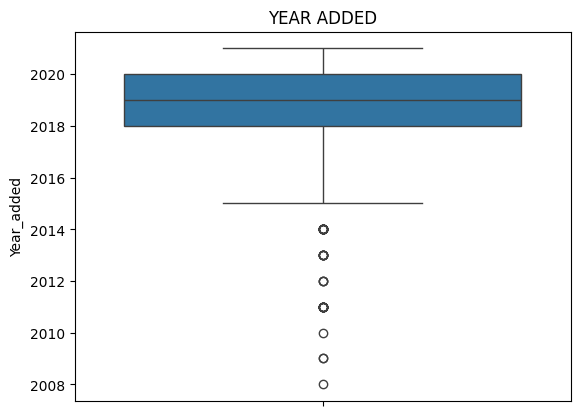

In [ ]:
sns.boxplot(data = df["Year_added"])
plt.title("YEAR ADDED")
plt.show()

The netflix was launched at 1997 and launched in India at 2016
there are many outlayers because the movies are released before 2016
thats why there are many outlayers
The center line represent the year of 2019

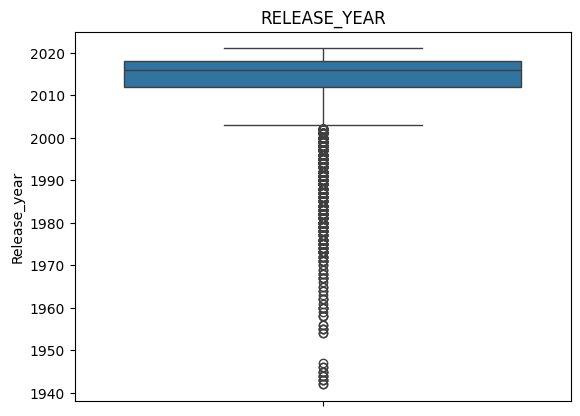

In [ ]:
sns.boxplot(data = df["Release_year"])
plt.title("RELEASE_YEAR")
plt.show()

Here also so many outlayers
Doesn't worry about the outlayers because it’s depend upon Release Year
The center line represent the year of 2019

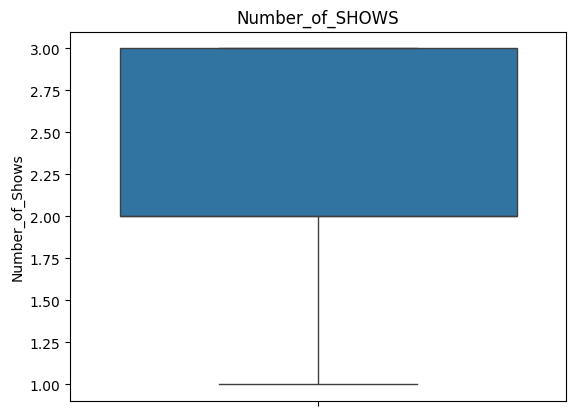

In [ ]:
sns.boxplot(data = df["Number_of_Shows"])
plt.title("Number_of_SHOWS")
plt.show()

Distribution of how many watchers typically view each title (posssible categories 1, 2, 3...).
Presence of outliers if some titles have unusual watch counts.

#TOP GENRES

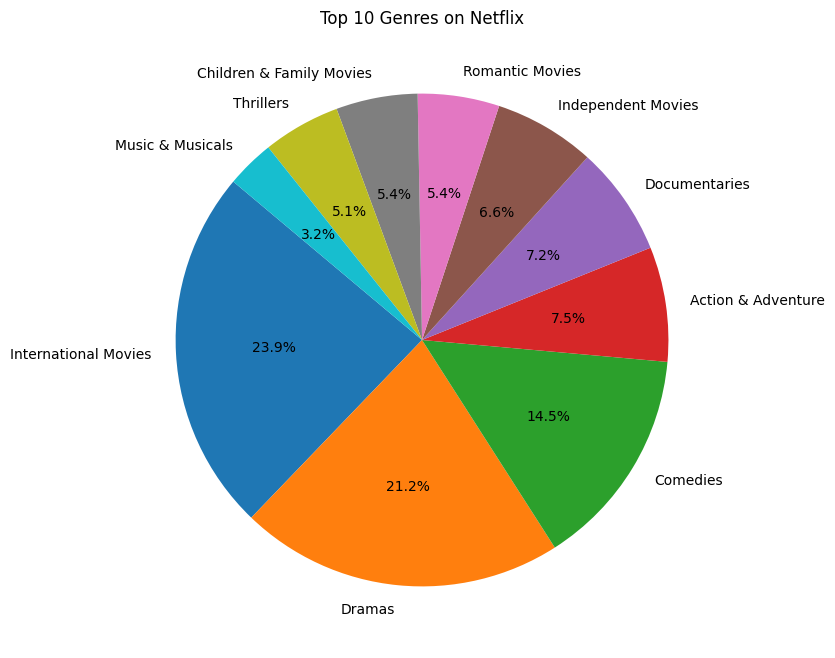

In [ ]:
genres = df['Listed_in'].dropna().str.split(',')   # split by comma
genres = genres.explode()                          # expand into rows
genres = genres.str.strip()                        # remove extra spaces
# 2. Count how many times each genre appears
genre_counts = genres.value_counts()
# 3. Take only the top 10 genres (for clear pie chart)
top_genres = genre_counts.head(10)
plt.figure(figsize=(8,8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Genres on Netflix")
plt.show()

#INSIGHTS

Here the International Movies gener is too high compare to other geners
then after that Dramas is second highest gener
the lowest gener is Music & Musicals

#3.PERFORM UNIVARIATE , BIVARIATE AND MULTIVARIATE ANALYSIS

#UNIVARIATE ANALYIS

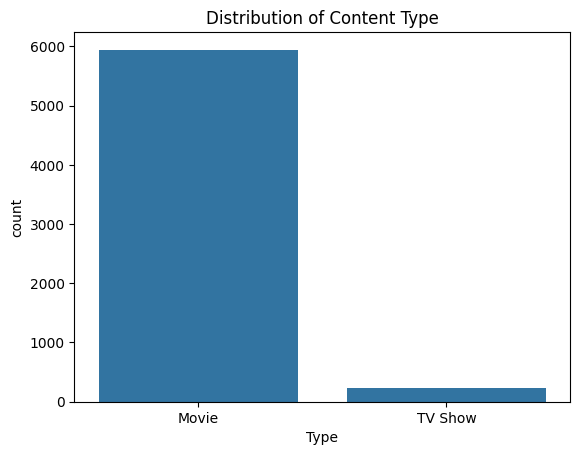

In [ ]:
sns.countplot(data=df, x='Type')
plt.title('Distribution of Content Type')
plt.show()

#INSIGHTS

Most of the content in the dataset consists of movies.
Here low TV shows compared to movies in the dataset.
Netflix has a higher proportion of Movies compared to TV Shows.

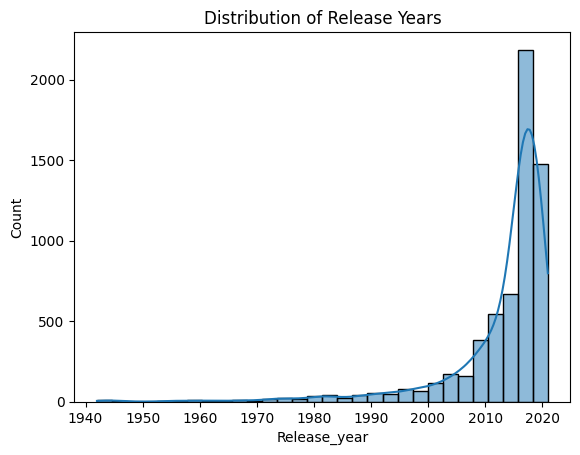

In [ ]:
sns.histplot(df['Release_year'], bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.show()


#INSIGHTS

There's a sharp increase in releases from 2015 to 2020
the predicts are due to Netflix's content expansion strategy.
Very few titles are from before 1980

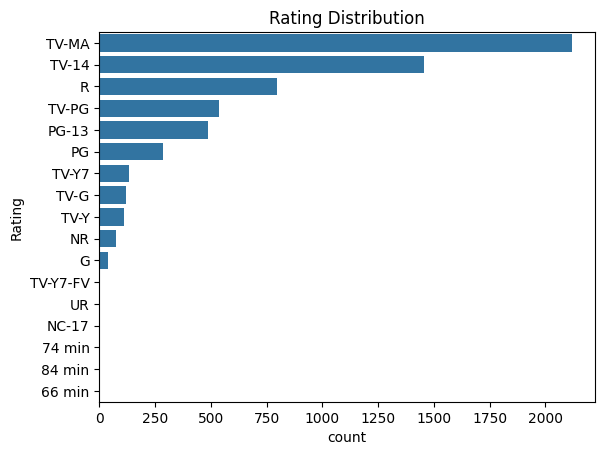

In [ ]:
sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index)
plt.title('Rating Distribution')
plt.show()


#INSIGHTS

TV-MV means mature audience
TV-14 means under 14 years childrens
These two are highly rating compared to others rating structure

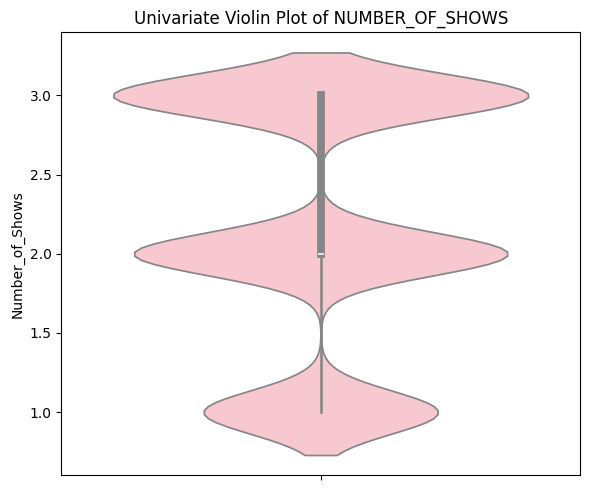

In [ ]:
plt.figure(figsize=(6, 5)) # Make the plot wider
sns.violinplot(y=df['Number_of_Shows'],color="pink")
plt.title('Univariate Violin Plot of NUMBER_OF_SHOWS')
plt.xlabel('')
plt.ylabel('Number_of_Shows')
plt.tight_layout()
plt.show()

#INSIGHTS

It's Shows the highest number of shows watchers.
The majority of watchers are three and two shows.
The most people watches the three types of shows.
Then follows that the two shows more people watches compare to the one show.

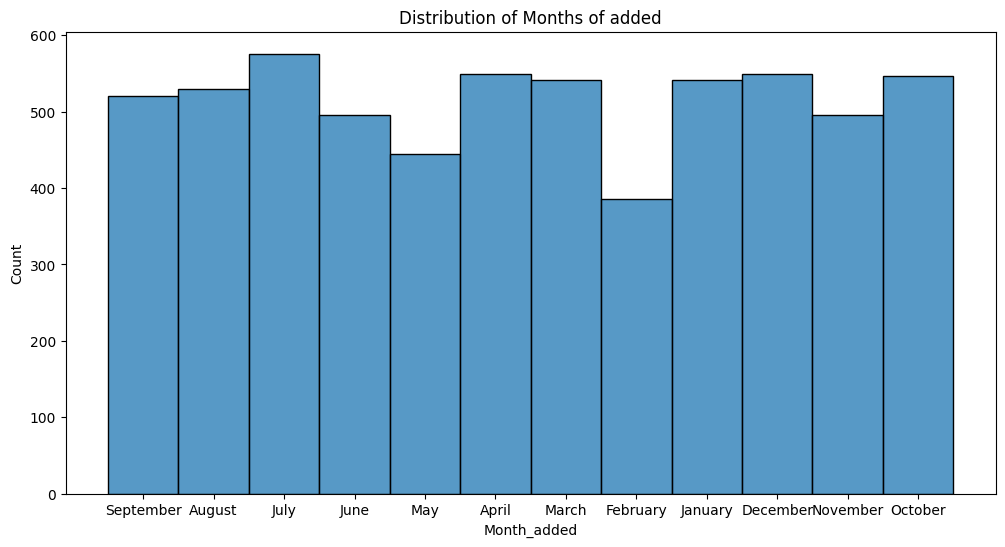

In [ ]:
plt.figure(figsize=(12, 6))  # Make the plot wider
plt.title('Distribution of Months of added')
sns.histplot(df['Month_added'], bins=30, kde=False);

#INSIGHTS

The July Month has highest movie added in netflix compare to the other months
After that April, January and october months are little bit lower compare to the July month
February is the Most least movies added in Netflix

#BIVARIATE ANALYSIS

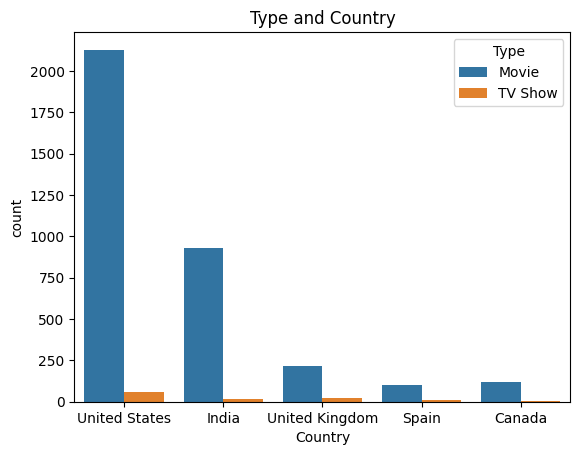

In [ ]:
top_countries = df['Country'].value_counts().head(5).index
sns.countplot(data=df[df['Country'].isin(top_countries)], x='Country', hue='Type')
plt.title('Type and Country')
plt.show()

#INSIGHTS

United States are highest watching movies and also the TV Shows compare to others
Then after that India became the second highest watching movies compare to others
Spain and Canada are the equal lowest of the watching netflix

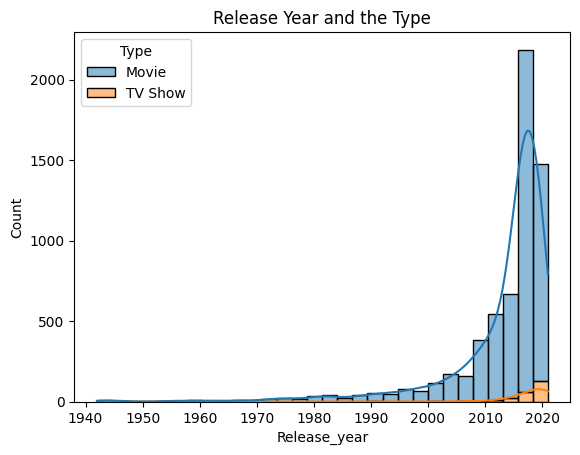

In [ ]:
sns.histplot(data=df, x='Release_year', hue='Type', multiple='stack', bins=30,kde=True)
plt.title('Release Year and the Type')
plt.show()

#INSIGHTS

In 2015-2020 the netflix gets increase higher comparing to remaining years.
But 2020 Becomes to lower.
The prediction are in covid pandamic sutiuation the people are spending their free time in Netflix.
So that time netflix gain highest watchers

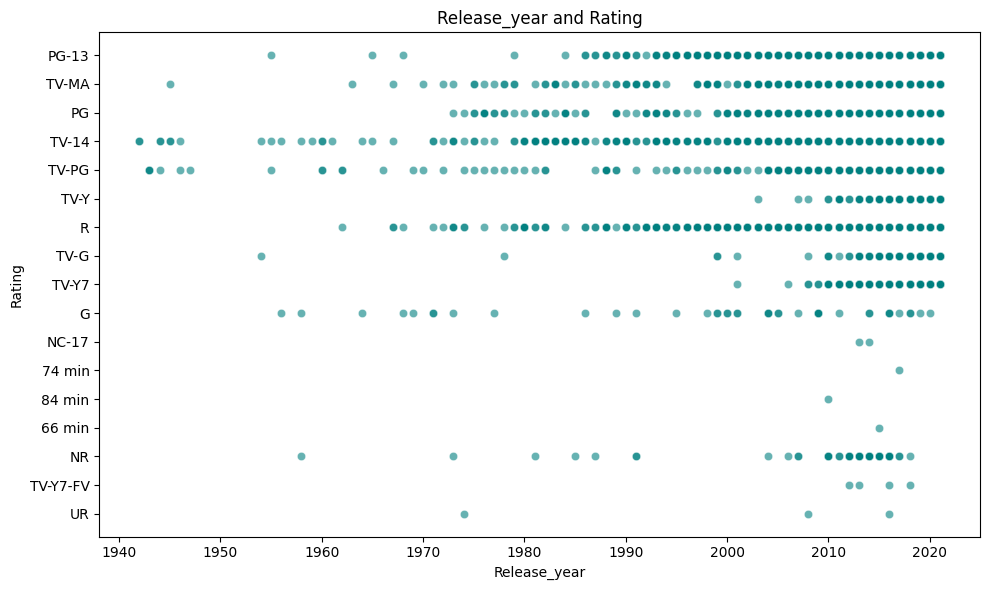

In [ ]:
plt.figure(figsize=(10, 6)) # Make the plot wider
sns.scatterplot(x='Release_year', y='Rating', data=df, color='teal', alpha=0.6)
plt.title('Release_year and Rating')
plt.xlabel('Release_year')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

#INSIGHTS

X-Axis: Release_year
Y-Axis: Rating
This chart represent the more correlation between (2000-2020)-(PG-13-TV-Y7)

# MULTIVARAITE ANALYSIS

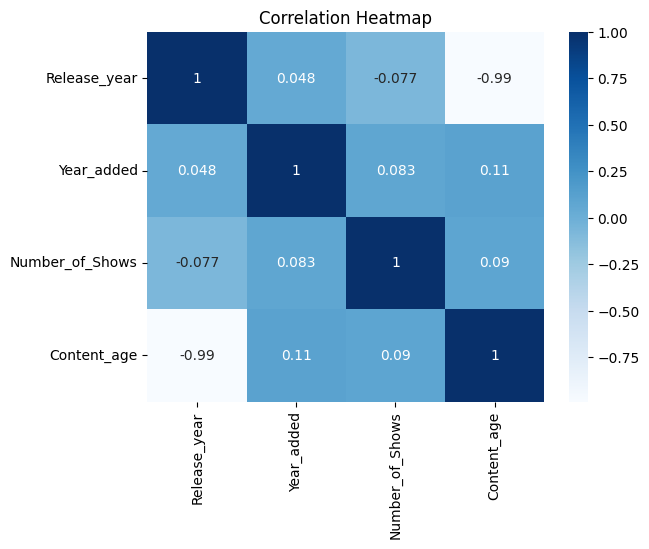

In [ ]:
corr = df[['Release_year', 'Year_added', 'Number_of_Shows', 'Content_age']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


#INSIGHTS

X-Axis: Release_year,year_added,number_of_shows,content_age.
Y-Axis: Release_year,year_added,number_of_shows,content_age.
This chart represent the more correlation 0.09 and low correlation -0.99

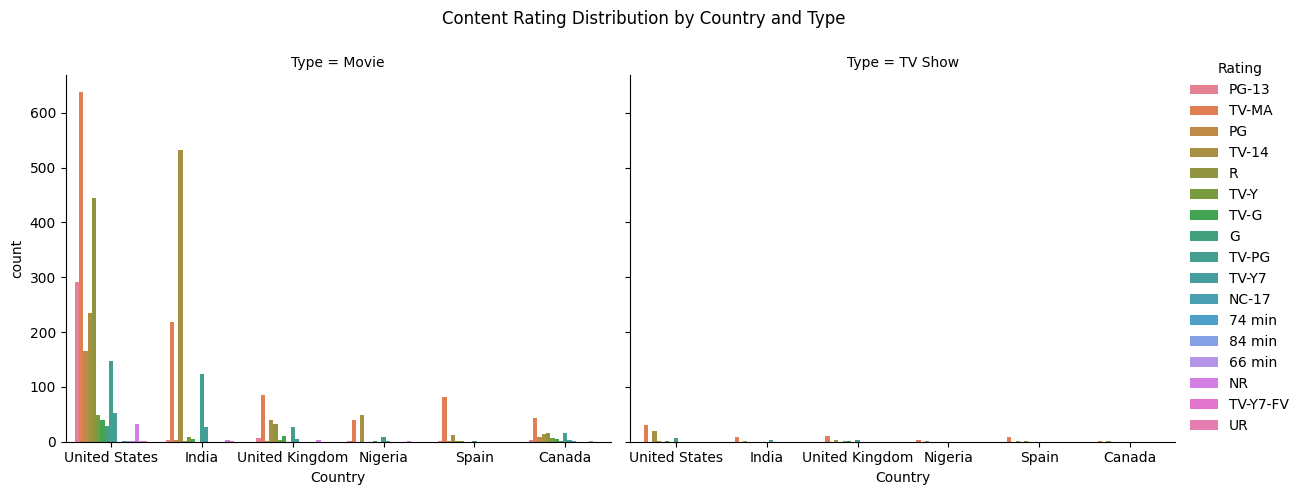

In [ ]:
top_countries = df['Country'].value_counts().head(6).index
sns.catplot(
    data=df[df['Country'].isin(top_countries)],
    x='Country', hue='Rating', col='Type',
    kind='count', height=5, aspect=1.2
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Content Rating Distribution by Country and Type')
plt.show()


#INSIGHTS


 X-Axis: United States,India,United Kingdom,Nigeria.spain,Canada. Varied by the type of Shows Named as Movie and TV Show
 Y-Axis: 0,100,200,300,400,500,600.
This chart represent the content rating by movie and tv show

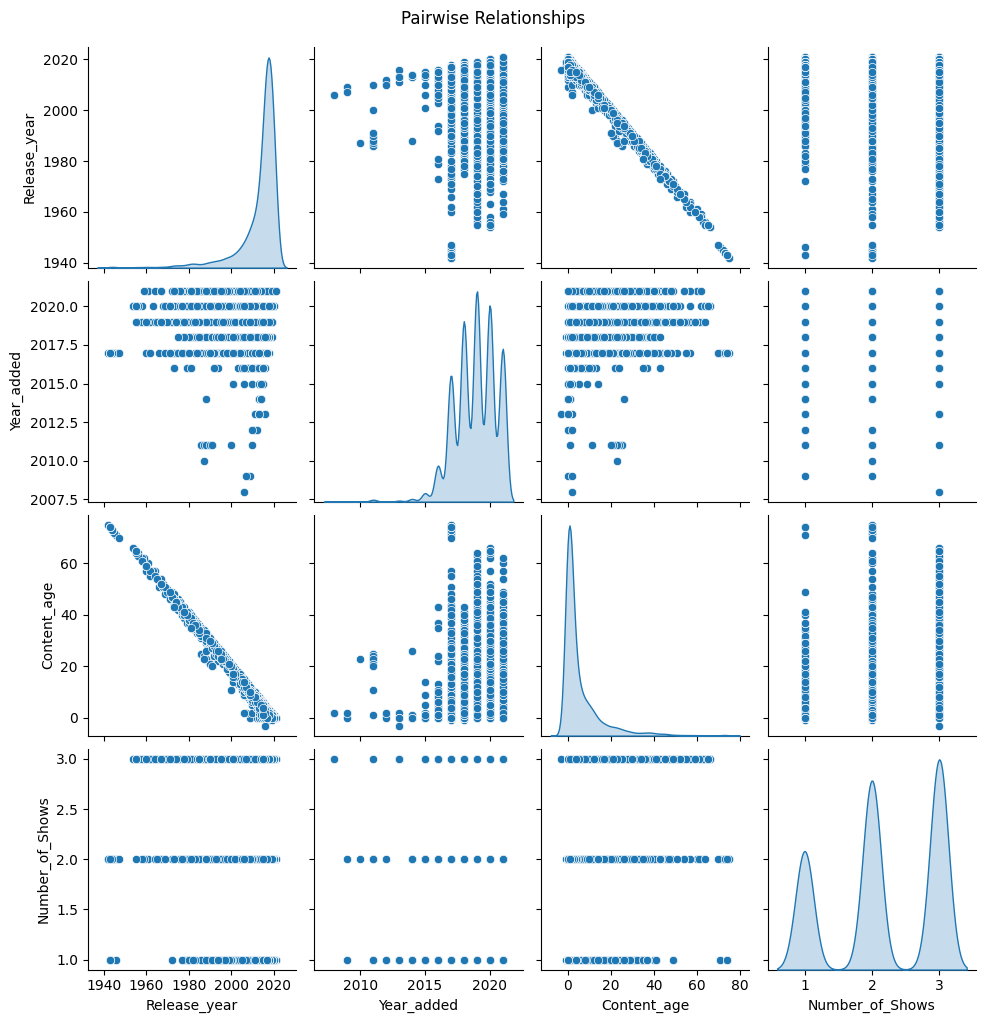

In [ ]:
sns.pairplot(df,vars=['Release_year', 'Year_added', 'Content_age', 'Number_of_Shows'],diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

#INSIGHTS

This pairplot represent the pairwise relationships between *Release_year *Year_added *Content_age *Number_of_Shows

#HYPOTHESIS TESTING

#TTEST: Content_age for Movies vs TV Shows

In [ ]:
movies_age = df[df['Type'] == 'Movie']['Content_age']
tv_age = df[df['Type'] == 'TV Show']['Content_age']

t_stat, p_value = ttest_ind(movies_age, tv_age, equal_var=False)  # Welch’s T-test
print("T-test Result:")
print(f"T-statistic :{ t_stat:.2f} , p-value :{ p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is significant difference in content_age between Movies and TV Shows.")
else:
    print("Fail to Reject H₀: There is no significant difference in content_age between Movies and TV Shows.")

T-test Result:
T-statistic :10.59 , p-value :0.0000
Reject H₀: There is significant difference in content_age between Movies and TV Shows.


#ANOVA: Release Year across Ratings

In [ ]:
group2018 = df[df['Year_added'] == 2018]['Content_age'].dropna()
group2019 = df[df['Year_added'] == 2019]['Content_age'].dropna()
group2020 = df[df['Year_added'] == 2020]['Content_age'].dropna()
anova_stat, anova_p = f_oneway(group2018, group2019, group2020)
print("ANOVA Result:")
print(f"F-statistic: {anova_stat:.2f}, p-value: {anova_p:.4f}")

if anova_p < 0.05:
    print("Reject H₀: There is a significant difference in content age across Year_added groups.")
else:
    print("Fail to Reject H₀: No significant difference in content age across Year_added groups.")

ANOVA Result:
F-statistic: 13.34, p-value: 0.0000
Reject H₀: There is a significant difference in content age across Year_added groups.
